In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

**Read File**

In [ ]:
rr=pd.read_table("Restaurant_Reviews.tsv")
rr

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


**Split Data**

In [ ]:
x=rr['Review'].values
x[0:5]

array(['Wow... Loved this place.', 'Crust is not good.',
       'Not tasty and the texture was just nasty.',
       'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.',
       'The selection on the menu was great and so were the prices.'],
      dtype=object)

In [ ]:
y=rr['Liked'].values
y[0:5]

array([1, 0, 0, 1, 1])

In [ ]:
rr['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

**Graph of Output**

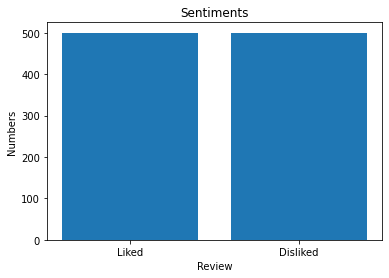

In [ ]:
x_plot=['Liked', 'Disliked']
y_plt=[rr['Liked'].value_counts(0), rr['Liked'].value_counts(1)]
y_plot=[y_plt[0][0],y_plt[0][1]]
plt.title("Sentiments")
plt.bar(x_plot,y_plot)
plt.xlabel("Review")
plt.ylabel("Numbers")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10)

**Sizes of training data and testing data**

In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(750,) (750,) (250,) (250,)


**Create count vectorizer**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(stop_words='english')

In [ ]:
x_train_v=cv.fit_transform(x_train)
x_test_v=cv.transform(x_test)

**Create SVC model**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
svc_model=SVC()
svc_model.fit(x_train_v, y_train)

SVC()

In [ ]:
svc_pred=svc_model.predict(x_test_v)
accuracy_score(y_test, svc_pred)

0.772

**Create pipeline model**

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
pipe_model=make_pipeline(CountVectorizer(), SVC())

In [ ]:
pipe_model.fit(x_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()), ('svc', SVC())])

In [ ]:
pipe_pred=pipe_model.predict(x_test)
accuracy_score(y_test, pipe_pred)

0.776

using naive bayes

multinomial bayes for SVC

In [ ]:
from sklearn.naive_bayes import  MultinomialNB

In [ ]:
nb1_model=MultinomialNB()
nb1_model.fit(x_train_v, y_train)

MultinomialNB()

In [ ]:
nb1_pred=nb1_model.predict(x_test_v)
accuracy_score(y_test, nb1_pred)

0.74

multinomial bayes for pipeline

In [ ]:
nb2_model=make_pipeline(CountVectorizer(), MultinomialNB())

In [ ]:
nb2_model.fit(x_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [ ]:
nb2_pred=nb2_model.predict(x_test)
accuracy_score(y_test, nb2_pred)

0.796

Accuracy of each models is:

In [ ]:
print("SVC model - ",accuracy_score(y_test,svc_pred))
print("SVC + pipeline model - ",accuracy_score(y_test,pipe_pred))
print("MultinomiaNB model - ",accuracy_score(y_test,nb1_pred))
print("Multinomial + pipeline model - ",accuracy_score(y_test,nb2_pred))

SVC model -  0.772
SVC + pipeline model -  0.776
MultinomiaNB model -  0.74
Multinomial + pipeline model -  0.796


Use a joblib to create new model

In [ ]:
import joblib as jb
jb.dump(nb2_model, 'NB-pipeline')

['NB-pipeline']

In [ ]:
jb_model=jb.load('NB-pipeline')
jb_model

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

We use jb_model to predict single input.

In [ ]:
#@title Sentiment Analysis
Write_a_review='Not impressed by restaurant' #@param {type:'string'}

jb_pred=jb_model.predict([Write_a_review])
if(jb_pred==1):
   print('Customer Liked The restaurant')
else:
     print('Customer Disliked The restaurant')


Customer Disliked The restaurant
